In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded=files.upload()
df=pd.read_csv("ex1data1.txt",usecols=[0,1],names=["population","profit"])

Saving ex1data1.txt to ex1data1.txt


In [ ]:
df


,population,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [ ]:
df.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [ ]:
x=df.iloc[:,0]
y=df.iloc[:,1]
m=len(x)

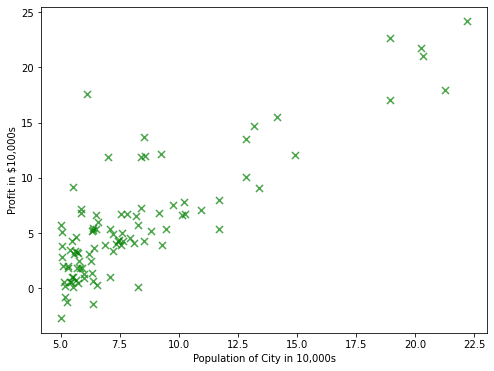

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x,y,c='g',marker='x',s=50, alpha=0.7)
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()

### **1)  Linear Regression Algorithm(Gradient Descent) For Fitting a Straight Line**

In [ ]:
def gradient_decent(alpha,n_itr):
  x=df["population"].values
  y=df["profit"].values
  m=len(x);
  theta0=0
  theta1=0
  for _ in range(n_itr):
    d_theta0=[]
    d_theta1=[]
    for i in range(m):
      d_theta0.append((theta0 + theta1*x[i])-y[i])
      d_theta1.append(((theta0 + theta1*x[i])-y[i])*x[i])

    theta0=theta0-alpha*(1/m)*sum(d_theta0)
    theta1=theta1-alpha*(1/m)*sum(d_theta1)

  return theta0,theta1
  
theta0,theta1=gradient_decent(0.01,1500)
print('intercept_term(theta0):',theta0,'\n','bias_term(theta1):',theta1)


intercept_term(theta0): -3.63029143940436 
 bias_term(theta1): 1.166362350335582


[]

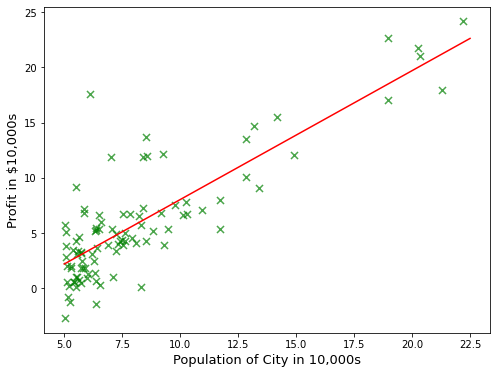

In [ ]:
hypothesis = theta0+np.dot(theta1,[5,22.5])
x=[5,22.5]
%matplotlib inline
plt.figure(figsize=(8,6))
plt.scatter(df['population'],df['profit'], c='g',marker='x',s=50, alpha=0.7);
plt.plot(x,hypothesis, c='r')
plt.xlabel("Population of City in 10,000s",size=13)
plt.ylabel("Profit in $10,000s",size=13)
plt.plot()
#plt.xlim(0,25)
#plt.ylim(-5,25)



In [ ]:
def predict(X):
    return theta0 + theta1*X
predict(5)

2.20152031227355

### **2) Linear Regression Model Using Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split;
from sklearn.linear_model import LinearRegression;

In [ ]:
x=df["population"].values
y=df["profit"].values
#x=df.iloc[:,0]
#y=df.iloc[:,1]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
lr=LinearRegression()

y_test_pred=predict(x_test)
df2=pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})
df2.head()

,Actual,Predicted
0,0.67861,3.782758
1,-2.68070,2.232895
2,13.50100,11.331805
3,24.14700,22.266452
4,2.44060,3.103935


In [ ]:
#We need to give both the fit and predict methods 2D arrays. our x_train, y_train and x_test are currently only 1D
x_train=x_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
x_test=x_test.reshape(1,-1)
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[]

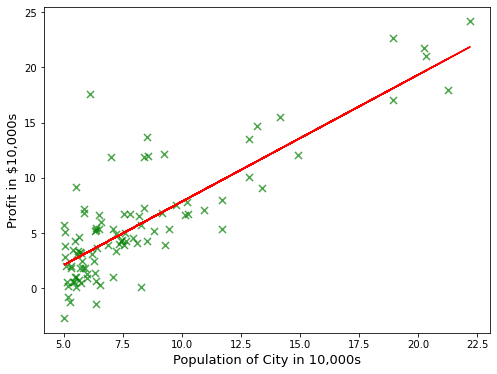

In [ ]:
%matplotlib inline
plt.figure(figsize=(8,6))
plt.scatter(x,y, c='g',marker='x',s=50, alpha=0.7);
plt.plot(x,y_predict, c='r')
plt.xlabel("Population of City in 10,000s",size=13)
plt.ylabel("Profit in $10,000s",size=13)
plt.plot()

In [ ]:
intr=lr.intercept_;
bias=lr.coef_
print('intercept_term(theta0):',intr,'\n','bias_term(theta1):',bias)

intercept_term(theta0): [-3.63457865] 
 bias_term(theta1): [[1.14764168]]


In [ ]:
from sklearn import metrics;

In [ ]:
meanAbsErr=metrics.mean_absolute_error(y_test,y_test_pred)
meanSqErr=metrics.mean_squared_error(y_test,y_test_pred)
rootMeanSqErr=np.sqrt(meanSqErr)
print("Mean Absolute Error: ",meanAbsErr)
print("Mean Squared Error: ",meanSqErr)
print("Root Mean Squared Error: ",rootMeanSqErr)

Mean Absolute Error:  2.4918108662413614
Mean Squared Error:  8.546992568957146
Root Mean Squared Error:  2.9235239983549213
